In [1]:
import pandas as pd


csv_file_path_dna = 'matrices/density_diff_dna.tsv'
csv_file_path_swap = 'matrices/density_diff_swap.tsv'

In [2]:
df_dna =  pd.read_csv(csv_file_path_dna, sep='\t')
df_swap = pd.read_csv(csv_file_path_swap, sep='\t')

df_dna.head()




,W/K,3,4,5,6,7,8,9,10,11,12,13,14,15
0,3,-2.20%,-0.08%,-0.79%,-0.05%,-0.14%,-0.10%,-0.04%,0.00%,-0.01%,0.00%,0.00%,0.00%,0.00%
1,4,-1.29%,-0.37%,0.58%,-0.26%,-0.06%,-0.02%,0.03%,-0.02%,-0.01%,0.00%,0.00%,0.00%,0.00%
2,5,-0.92%,0.23%,0.34%,-0.23%,0.04%,0.01%,0.00%,-0.01%,-0.01%,0.01%,0.00%,0.00%,0.00%
3,6,-1.19%,-0.76%,0.82%,0.30%,-0.02%,-0.03%,-0.01%,-0.02%,-0.02%,0.00%,0.00%,0.00%,0.00%
4,7,-2.13%,-0.44%,0.36%,0.38%,-0.02%,-0.03%,0.01%,0.00%,0.00%,-0.01%,-0.01%,-0.01%,0.00%


In [3]:
def remove_percentages(df):

    # change all cells that are percentages to floats
    for col in df.columns:
        for i, val in enumerate(df[col]):
            if '%' in str(val):
                df.at[i, col] = float(val.strip('%'))

    return df



df_dna = remove_percentages(df_dna)
df_swap = remove_percentages(df_swap)

df_dna.head()

,W/K,3,4,5,6,7,8,9,10,11,12,13,14,15
0,3,-2.2,-0.08,-0.79,-0.05,-0.14,-0.1,-0.04,0.0,-0.01,0.0,0.0,0.0,0.0
1,4,-1.29,-0.37,0.58,-0.26,-0.06,-0.02,0.03,-0.02,-0.01,0.0,0.0,0.0,0.0
2,5,-0.92,0.23,0.34,-0.23,0.04,0.01,0.0,-0.01,-0.01,0.01,0.0,0.0,0.0
3,6,-1.19,-0.76,0.82,0.3,-0.02,-0.03,-0.01,-0.02,-0.02,0.0,0.0,0.0,0.0
4,7,-2.13,-0.44,0.36,0.38,-0.02,-0.03,0.01,0.0,0.0,-0.01,-0.01,-0.01,0.0


C:\Users\tzion\AppData\Local\Temp\ipykernel_16164\275275324.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")


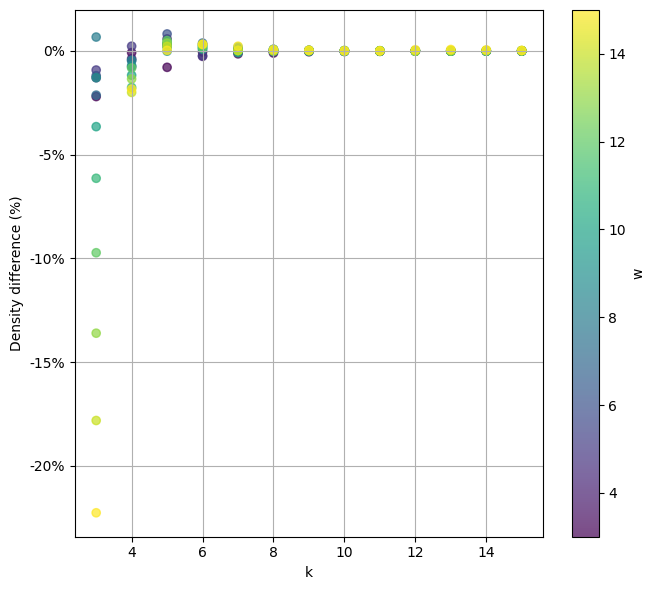

C:\Users\tzion\AppData\Local\Temp\ipykernel_16164\275275324.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")


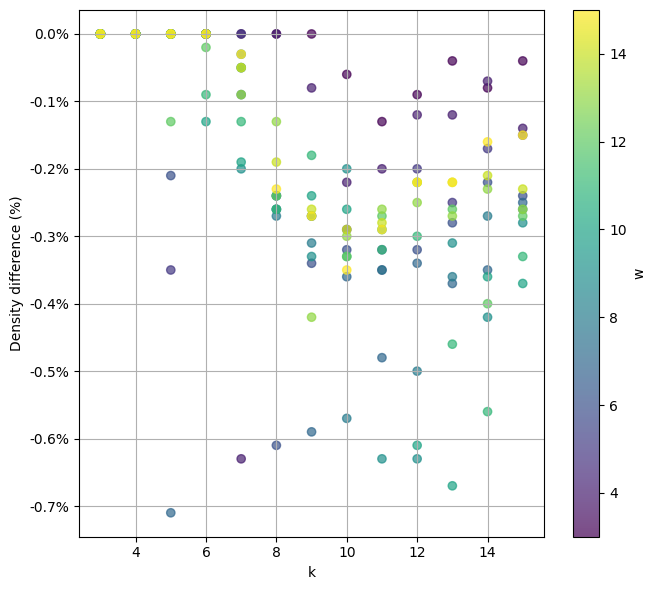

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colorbar as cbar
import numpy as np


def plot(df, name, high_precision=False, y_label=False, colorbar=False, title=None):
    # Prepare data for plotting
    df_melted = df.melt(id_vars=["W/K"], var_name="K", value_name="Value")
    df_melted["K"] = pd.to_numeric(df_melted["K"])  # Ensure K is numeric

    # Convert values to percentages
    df_melted["Value"] = df_melted["Value"]

    # Ensure W/K is numeric (if needed)
    df_melted["W/K"] = pd.to_numeric(df_melted["W/K"])

    # Create a color map for the W values
    unique_w_values = df_melted["W/K"].unique()
    norm = plt.Normalize(vmin=df_melted["W/K"].min(), vmax=df_melted["W/K"].max())
    cmap = cm.get_cmap("viridis")

    # Plotting
    if colorbar:
        plt.figure(figsize=(6.8, 6))
    else:
        plt.figure(figsize=(6, 6))


    scatter = plt.scatter(
        df_melted["K"], 
        df_melted["Value"], 
        c=df_melted["W/K"], 
        cmap=cmap, 
        norm=norm, 
        alpha=0.7
    )

    if title:
        plt.title(title)

    plt.xlabel("k")
    if y_label:
        plt.ylabel("Density difference (%)")  # Update the y-axis label to reflect percentage
    plt.grid(True)

    # Add a color bar to the plot
    if colorbar:
        cbar = plt.colorbar(scatter)
        cbar.set_label("w")  # Label for the color bar

    # Format y-axis ticks as percentages with appropriate precision
    if high_precision:
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.1f}%"))
    else:
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0f}%"))


   


    plt.tight_layout()
    plt.savefig(f'{name}.svg')
    plt.show()


plot(df_dna, 'diff_after_dna', y_label=True, colorbar=True)
plot(df_swap, 'diff_after_swap', high_precision=True, colorbar=True, y_label=True)
